In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("/Users/shivanshmahajan/Desktop/DataScinece/project/Medical App/combined/Pages/lung output.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [21]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [4]:
df["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [5]:
df["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

In [6]:
df["LUNG_CANCER"].value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()
df['GENDER'] = encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = encoder.fit_transform(df['LUNG_CANCER'])

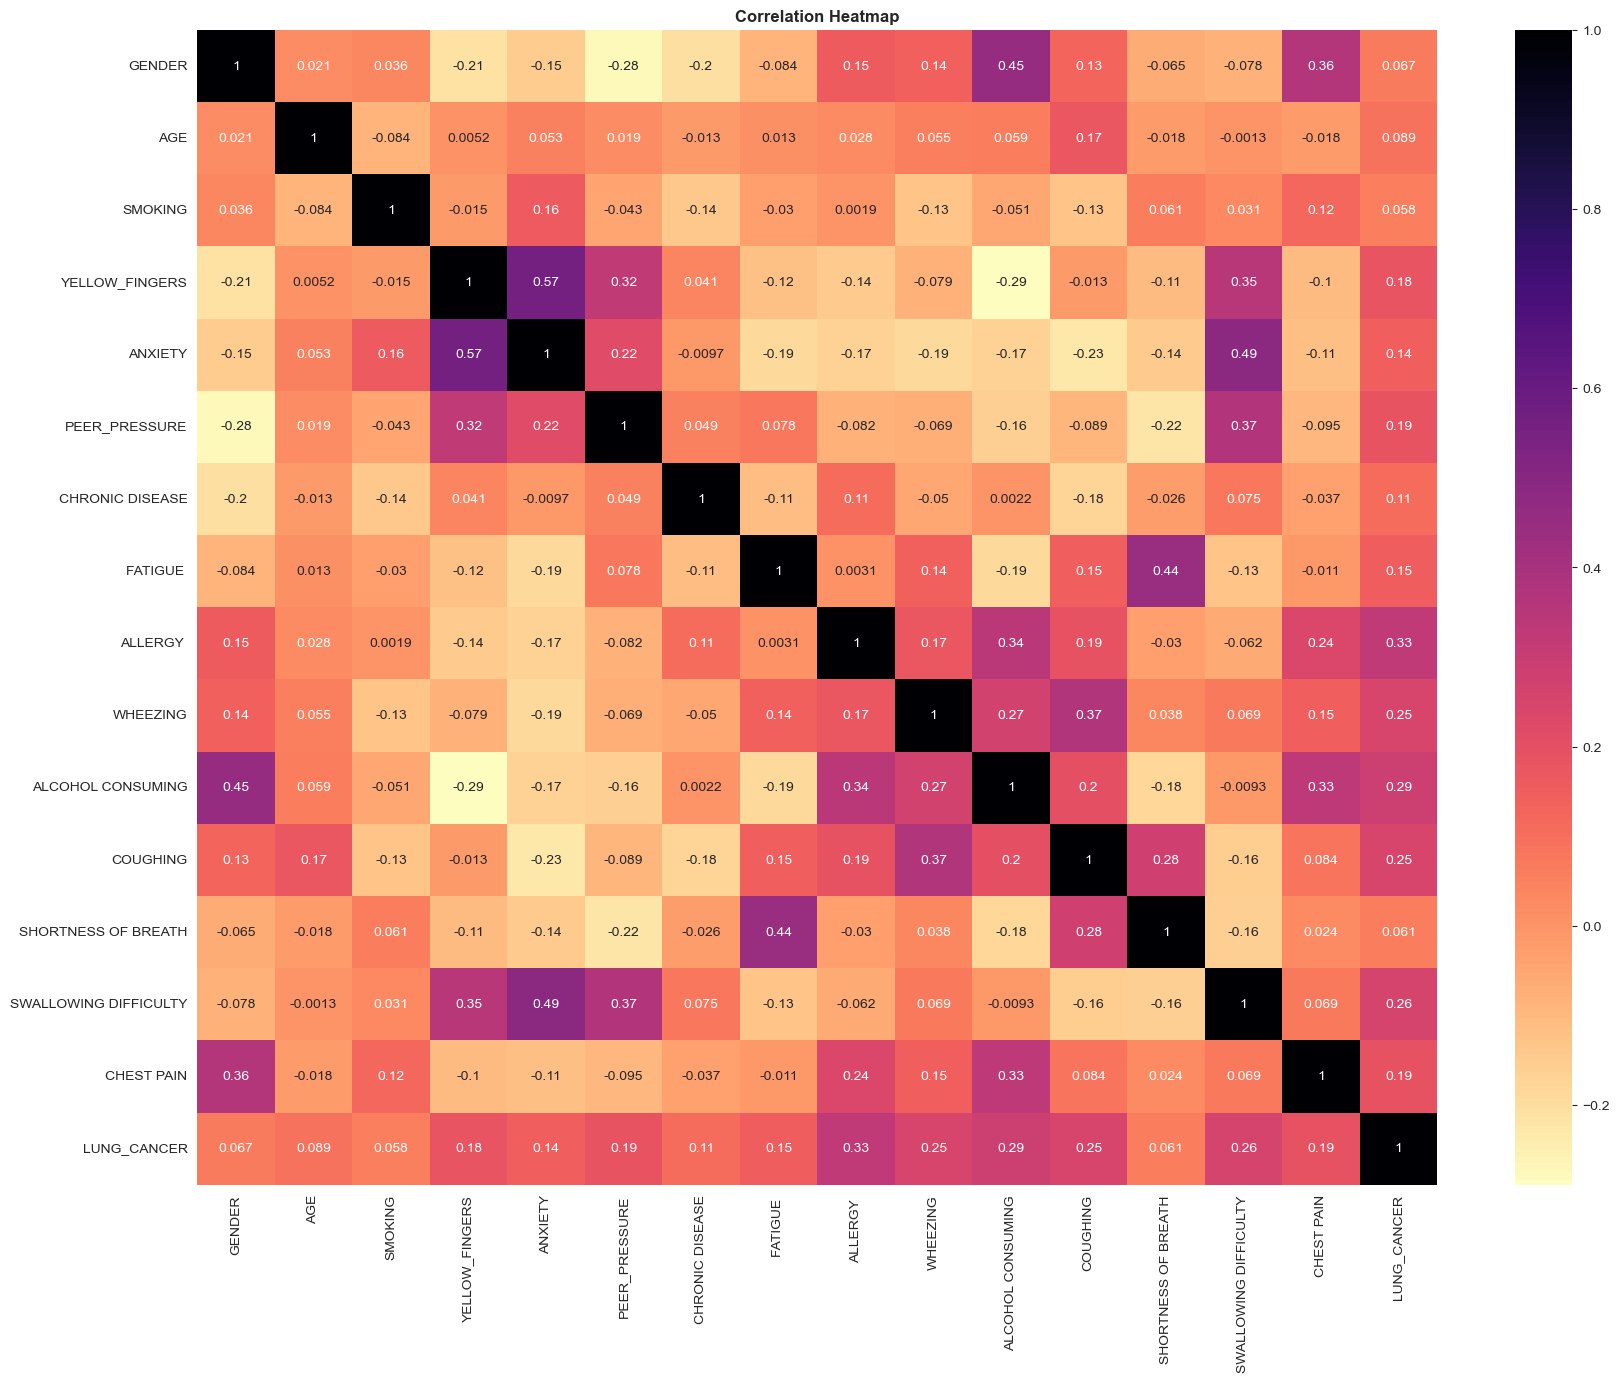

In [9]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, cmap = "magma_r")
plt.title("Correlation Heatmap",fontdict = {"fontweight":"bold"})
plt.show()

In [10]:
x = df.drop(["LUNG_CANCER"], axis = 1)

In [11]:
y = df["LUNG_CANCER"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(x_train, y_train)

/Users/shivanshmahajan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score = model.score(x_test,y_test)

In [20]:
print(r2_score*100,'%')

96.7741935483871 %


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model1 = RandomForestClassifier(n_estimators = 3, criterion = "entropy")

In [24]:
model1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3)

In [25]:
y_pred = model1.predict(x_test)

In [26]:
r2_score = model1.score(x_test,y_test)

In [27]:
print(r2_score*100,'%')

90.32258064516128 %


AGE: 0.25913615200450446
ALLERGY : 0.14749107424082916
ALCOHOL CONSUMING: 0.08873242067001295
FATIGUE : 0.07399992257236054
PEER_PRESSURE: 0.06360434112026651
ANXIETY: 0.05368007319227449
YELLOW_FINGERS: 0.04289569380412761
GENDER: 0.04229982600478885
WHEEZING: 0.04061944193282886
SMOKING: 0.034437740948469873
SWALLOWING DIFFICULTY: 0.0343119872705537
CHEST PAIN: 0.033970514934714965
CHRONIC DISEASE: 0.03217533059008329
COUGHING: 0.02983440595451729
SHORTNESS OF BREATH: 0.022811074759667385


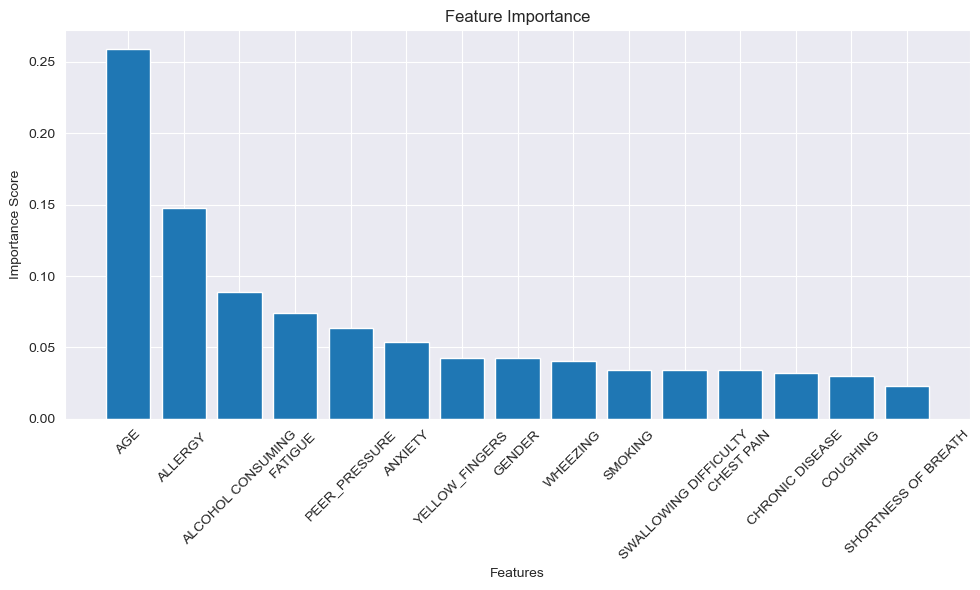

In [28]:
feature_importances = model1.feature_importances_
#print(feature_importances)
sorted_indices = np.argsort(feature_importances)[::-1]

# Arrange feature importances and names in the sorted order
sorted_importances = feature_importances[sorted_indices]
sorted_names = np.array(df.columns)[sorted_indices]
for name, importance in zip(sorted_names, sorted_importances):
    print(f"{name}: {importance}")
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align="center")
plt.xticks(range(len(sorted_importances)), sorted_names, rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [29]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 158 to 87
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 62 non-null     int64
 1   AGE                    62 non-null     int64
 2   SMOKING                62 non-null     int64
 3   YELLOW_FINGERS         62 non-null     int64
 4   ANXIETY                62 non-null     int64
 5   PEER_PRESSURE          62 non-null     int64
 6   CHRONIC DISEASE        62 non-null     int64
 7   FATIGUE                62 non-null     int64
 8   ALLERGY                62 non-null     int64
 9   WHEEZING               62 non-null     int64
 10  ALCOHOL CONSUMING      62 non-null     int64
 11  COUGHING               62 non-null     int64
 12  SHORTNESS OF BREATH    62 non-null     int64
 13  SWALLOWING DIFFICULTY  62 non-null     int64
 14  CHEST PAIN             62 non-null     int64
dtypes: int64(15)
memory usage: 7.8 KB


In [30]:
x_test.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
158,0,56,1,1,2,2,2,2,2,2,2,1,2,2,2
188,1,65,2,2,2,2,2,1,1,1,1,1,1,1,1
52,0,54,2,1,1,2,1,2,2,2,2,2,1,2,2
137,1,67,1,1,1,2,1,2,1,2,1,2,2,1,2
112,0,68,1,1,1,2,1,2,1,2,1,2,2,1,2


In [31]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 76 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 247 non-null    int64
 1   AGE                    247 non-null    int64
 2   SMOKING                247 non-null    int64
 3   YELLOW_FINGERS         247 non-null    int64
 4   ANXIETY                247 non-null    int64
 5   PEER_PRESSURE          247 non-null    int64
 6   CHRONIC DISEASE        247 non-null    int64
 7   FATIGUE                247 non-null    int64
 8   ALLERGY                247 non-null    int64
 9   WHEEZING               247 non-null    int64
 10  ALCOHOL CONSUMING      247 non-null    int64
 11  COUGHING               247 non-null    int64
 12  SHORTNESS OF BREATH    247 non-null    int64
 13  SWALLOWING DIFFICULTY  247 non-null    int64
 14  CHEST PAIN             247 non-null    int64
dtypes: int64(15)
memory usage: 30.9 KB


In [32]:
x_test.to_csv('lung output.csv')

In [33]:
import joblib
joblib.dump(model1, 'Lung_Cancer_model.joblib')
loaded_model = joblib.load('Lung_Cancer_model.joblib')

In [34]:
import pickle

In [35]:
with open('Lung_Cancer_model.pkl', 'wb') as file:
    pickle.dump(model1, file)
with open('Lung_Cancer_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    

In [37]:
input_data=(0,55,2,1,2,1,1,2,1,1,1,1,1,1,1)
input_data=np.asarray(input_data)
input_data_reshaped=input_data.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
#print(prediction)
if(prediction==0):
    print('the person is Safe')
else:
    print('the person Has Lung Cancer')

the person is Safe


/Users/shivanshmahajan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
